In [164]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Loading and preparing the data 

In [169]:
df = pd.read_csv("stocks_combined_unscaled.csv", index_col=0)
df['daily_volatility'] = df['high'] - df['low']
df.head()

,date,permno,ticker,price,volume,return,high,low,open,avg_price,mkt_cap,pct_return,name_price_attention,daily_volatility
0,2014-01-02,10107,MSFT,37.16,30423757.0,-0.006683,37.40,37.10,37.350,37.25,308428000.0,-0.6683,3.15,0.30
1,2014-01-03,10107,MSFT,36.91,30944370.0,-0.006728,37.22,36.60,37.200,36.91,306353000.0,-0.6728,1.54,0.62
2,2014-01-06,10107,MSFT,36.13,43111355.0,-0.021133,36.89,36.11,36.850,36.50,299879000.0,-2.1133,2.24,0.78
3,2014-01-07,10107,MSFT,36.41,35478667.0,0.007750,36.49,36.21,36.325,36.35,302203000.0,0.7750,1.19,0.28
4,2014-01-08,10107,MSFT,35.76,59452427.0,-0.017852,36.14,35.58,36.000,35.86,296808000.0,-1.7852,1.68,0.56


In [170]:
#df['stock_dummy'] = df['ticker'].astype('category').cat.codes
# drop permno
df = df.drop(['permno'], axis=1)

df.head()

,date,ticker,price,volume,return,high,low,open,avg_price,mkt_cap,pct_return,name_price_attention,daily_volatility
0,2014-01-02,MSFT,37.16,30423757.0,-0.006683,37.40,37.10,37.350,37.25,308428000.0,-0.6683,3.15,0.30
1,2014-01-03,MSFT,36.91,30944370.0,-0.006728,37.22,36.60,37.200,36.91,306353000.0,-0.6728,1.54,0.62
2,2014-01-06,MSFT,36.13,43111355.0,-0.021133,36.89,36.11,36.850,36.50,299879000.0,-2.1133,2.24,0.78
3,2014-01-07,MSFT,36.41,35478667.0,0.007750,36.49,36.21,36.325,36.35,302203000.0,0.7750,1.19,0.28
4,2014-01-08,MSFT,35.76,59452427.0,-0.017852,36.14,35.58,36.000,35.86,296808000.0,-1.7852,1.68,0.56


In [179]:
df_scaled= pd.read_csv("stocks_log_norm_scaled.csv", index_col=0)
df_scaled = df_scaled.drop(['permno'], axis=1)
df_scaled.head()

,date,ticker,price,volume,return,high,low,open,avg_price,mkt_cap,pct_return,name_price_attention,volatility,industry,stock_dummy,log_return,log_name_price_attention
0,2014-01-02,MSFT,-0.999221,1.117934,-0.006683,-0.992613,-1.004799,-0.997672,-0.998750,0.138220,-0.419196,-0.712226,-0.494860,Technology,20,-0.006705,1.423108
1,2014-01-03,MSFT,-1.001527,1.148820,-0.006728,-0.994243,-1.009502,-0.999057,-1.001888,0.132557,-0.421781,-0.816796,-0.438358,Technology,20,-0.006751,0.932164
2,2014-01-06,MSFT,-1.008721,1.870624,-0.021133,-0.997232,-1.014112,-1.002286,-1.005672,0.114890,-1.249333,-0.771331,-0.410107,Technology,20,-0.021359,1.175573
3,2014-01-07,MSFT,-1.006139,1.417816,0.007750,-1.000854,-1.013171,-1.007130,-1.007056,0.121232,0.409965,-0.839528,-0.498392,Technology,20,0.007720,0.783902
4,2014-01-08,MSFT,-1.012134,2.840056,-0.017852,-1.004023,-1.019098,-1.010129,-1.011579,0.106510,-1.060843,-0.807703,-0.448952,Technology,20,-0.018013,0.985817


In [180]:
# create summary statistics
# rename volatilitity to daily_volatility
df_scaled = df_scaled.rename(columns={"volatility": "daily_volatility"})

df.describe()

,price,volume,return,high,low,open,avg_price,mkt_cap,pct_return,name_price_attention,daily_volatility
count,70448.000000,7.044800e+04,70448.000000,70448.000000,70448.000000,70448.000000,70448.000000,7.044800e+04,70448.000000,70448.000000,70448.000000
mean,145.495397,1.157947e+07,0.000614,147.012658,143.910029,145.475873,145.461344,2.577778e+08,0.061384,14.115716,3.102629
std,108.420623,1.685646e+07,0.017407,110.429143,106.300702,108.378896,108.347582,3.664491e+08,1.740688,15.396513,5.663514
min,21.349900,3.053580e+05,-0.238484,21.620000,21.270000,21.340000,21.445000,1.715150e+07,-23.848400,0.000000,0.090000
25%,80.590000,3.327002e+06,-0.006783,81.240000,80.000000,80.580000,80.613750,1.069959e+08,-0.678300,0.000000,1.040000
50%,125.940000,6.196272e+06,0.000619,127.090000,124.750000,125.900000,125.850000,1.683775e+08,0.061900,9.680000,1.870010
75%,176.352508,1.294353e+07,0.008153,177.950000,174.610000,176.292492,176.281250,2.482573e+08,0.815300,21.840000,3.450000
max,2238.750000,6.182376e+08,0.260449,2318.489990,2186.520020,2295.120120,2252.505005,3.081156e+09,26.044900,100.000000,323.879880


In [177]:
# count nans in df 
df_scaled.isnull().sum()

date                        0
ticker                      0
price                       0
volume                      0
return                      0
high                        0
low                         0
open                        0
avg_price                   0
mkt_cap                     0
pct_return                  0
name_price_attention        0
daily_volatility            0
industry                    0
stock_dummy                 0
log_return                  0
log_name_price_attention    0
dtype: int64

In [175]:
df_scaled.describe()

,price,volume,return,high,low,open,avg_price,mkt_cap,pct_return,name_price_attention,daily_volatility,stock_dummy,log_return,log_name_price_attention
count,7.044800e+04,7.044800e+04,70448.000000,7.044800e+04,7.044800e+04,7.044800e+04,70448.000000,7.044800e+04,7.044800e+04,7.044800e+04,7.044800e+04,70448.000000,70448.000000,70448.000000
mean,-2.969336e-16,1.936523e-17,0.000614,9.037110e-17,-1.291016e-16,-1.032813e-16,0.000000,-2.582031e-17,-2.138245e-17,-2.582031e-17,3.873047e-17,13.500000,0.000462,2.000092
std,1.000007e+00,1.000007e+00,0.017407,1.000007e+00,1.000007e+00,1.000007e+00,1.000007,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,8.077805,0.017416,1.379421
min,-1.145044e+00,-6.688350e-01,-0.238484,-1.135511e+00,-1.153717e+00,-1.145396e+00,-1.144624,-6.566479e-01,-1.373592e+01,-9.168190e-01,-5.319401e-01,0.000000,-0.272444,0.000000
25%,-5.986486e-01,-4.895764e-01,-0.006783,-5.956138e-01,-6.012235e-01,-5.987912e-01,-0.598519,-4.114707e-01,-4.249406e-01,-9.168190e-01,-3.641986e-01,6.750000,-0.006806,0.000000
50%,-1.803673e-01,-3.193574e-01,0.000619,-1.804125e-01,-1.802450e-01,-1.806257e-01,-0.181005,-2.439655e-01,2.964425e-04,-2.881008e-01,-2.176436e-01,13.500000,0.000619,2.368373
75%,2.846076e-01,8.092260e-02,0.008153,2.801576e-01,2.888051e-01,2.843435e-01,0.284456,-2.598057e-02,4.331168e-01,5.016940e-01,6.133531e-02,20.250000,0.008120,3.128513
max,1.930693e+01,3.598990e+01,0.260449,1.966413e+01,1.921553e+01,1.983467e+01,19.447214,7.704748e+00,1.492726e+01,5.578204e+00,5.663966e+01,27.000000,0.231468,4.615121


In [178]:
# kick out all columns starting from stock dummy to log_name_price_attention 

df_scaled = df_scaled.drop(df_scaled.loc[:, 'stock_dummy':'log_name_price_attention'], axis=1)

df_scaled.describe()

,price,volume,return,high,low,open,avg_price,mkt_cap,pct_return,name_price_attention,daily_volatility
count,7.044800e+04,7.044800e+04,70448.000000,7.044800e+04,7.044800e+04,7.044800e+04,70448.000000,7.044800e+04,7.044800e+04,7.044800e+04,7.044800e+04
mean,-2.969336e-16,1.936523e-17,0.000614,9.037110e-17,-1.291016e-16,-1.032813e-16,0.000000,-2.582031e-17,-2.138245e-17,-2.582031e-17,3.873047e-17
std,1.000007e+00,1.000007e+00,0.017407,1.000007e+00,1.000007e+00,1.000007e+00,1.000007,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00
min,-1.145044e+00,-6.688350e-01,-0.238484,-1.135511e+00,-1.153717e+00,-1.145396e+00,-1.144624,-6.566479e-01,-1.373592e+01,-9.168190e-01,-5.319401e-01
25%,-5.986486e-01,-4.895764e-01,-0.006783,-5.956138e-01,-6.012235e-01,-5.987912e-01,-0.598519,-4.114707e-01,-4.249406e-01,-9.168190e-01,-3.641986e-01
50%,-1.803673e-01,-3.193574e-01,0.000619,-1.804125e-01,-1.802450e-01,-1.806257e-01,-0.181005,-2.439655e-01,2.964425e-04,-2.881008e-01,-2.176436e-01
75%,2.846076e-01,8.092260e-02,0.008153,2.801576e-01,2.888051e-01,2.843435e-01,0.284456,-2.598057e-02,4.331168e-01,5.016940e-01,6.133531e-02
max,1.930693e+01,3.598990e+01,0.260449,1.966413e+01,1.921553e+01,1.983467e+01,19.447214,7.704748e+00,1.492726e+01,5.578204e+00,5.663966e+01


In [113]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Define the formula
formula = 'Q("return") ~ C(stock_dummy) + name_price_attention'

# Fit the model using RLM for a robust regression
model = smf.rlm(formula, data=df, M=sm.robust.norms.HuberT())
results = model.fit()

# Print the summary
print(results.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:            Q("return")   No. Observations:                70448
Model:                            RLM   Df Residuals:                    70419
Method:                          IRLS   Df Model:                           28
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 06 Mar 2024                                         
Time:                        15:57:41                                         
No. Iterations:                    28                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0007 

In [114]:
df_test = pd.read_csv("quarterly_financial_data_2013_2023.csv")


#df_test = df_test.rename(columns = {'datedate': 'date'})
df_test['date'] = df_test['datadate']
df_test['ticker'] = df_test['tic']
df_test.head()

,gvkey,datadate,fqtr,tic,conm,net_income,revenue,total_assets,shareholders_equity,total_liabilities,total_debt,sales,operating_activities_cf,capital_expenditures,interest_expense,common_shares_outstanding,earnings_per_share,dividends_per_share,date,ticker
0,1690,2013-03-31,2,AAPL,APPLE INC,9547.0,43603.0,194743.0,135490.0,59253.0,0.0,43603.0,35930.0,4325.0,0.0,940.094,10.16,2.65,2013-03-31,AAPL
1,1690,2013-06-30,3,AAPL,APPLE INC,6900.0,35323.0,199856.0,123354.0,76502.0,16958.0,35323.0,43758.0,6210.0,53.0,908.442,7.51,3.05,2013-06-30,AAPL
2,1690,2013-09-30,4,AAPL,APPLE INC,7512.0,37472.0,207000.0,123549.0,83451.0,16960.0,37472.0,53666.0,8165.0,83.0,899.213,8.31,3.05,2013-09-30,AAPL
3,1690,2013-12-31,1,AAPL,APPLE INC,13072.0,57594.0,225184.0,129684.0,95500.0,16961.0,57594.0,22670.0,1985.0,84.0,892.447,14.59,3.05,2013-12-31,AAPL
4,1690,2014-03-31,2,AAPL,APPLE INC,10223.0,45646.0,205989.0,120179.0,85810.0,16962.0,45646.0,36208.0,3367.0,85.0,861.745,11.69,3.05,2014-03-31,AAPL


In [115]:
anomalies_df = pd.merge(df, df_test[['date','ticker','revenue', 'total_assets', 'earnings_per_share']], on=['date', 'ticker'], how = 'left')
anomalies_df['book_to_market'] = anomalies_df['total_assets'] / anomalies_df['mkt_cap']
anomalies_df['dt_date'] = pd.to_datetime(anomalies_df['date'])
anomalies_df['jan_dummy'] = (anomalies_df['dt_date'].dt.month == 1).astype(int)
anomalies_df['jan_dummy'] = anomalies_df['jan_dummy'].fillna(0)
anomalies_df['monday_dummy'] = (anomalies_df['dt_date'].dt.dayofweek == 0).astype(int)
anomalies_df['monday_dummy'] = anomalies_df['monday_dummy'].fillna(0)
anomalies_df['annual_rep_release'] = anomalies_df['book_to_market'].notna().astype(int)
anomalies_df['annual_rep_release'] = anomalies_df['annual_rep_release'].fillna(0)
#anomalies_df[anomalies_df['book_to_market'].notna()].head()
anomalies_df.head()

,date,permno,ticker,price,volume,return,high,low,open,avg_price,...,daily_volatility,stock_dummy,revenue,total_assets,earnings_per_share,book_to_market,dt_date,jan_dummy,monday_dummy,annual_rep_release
0,2014-01-02,10107,MSFT,37.16,30423757.0,-0.006683,37.40,37.10,37.350,37.25,...,0.30,20,NaN,NaN,NaN,NaN,2014-01-02,1,0,0
1,2014-01-03,10107,MSFT,36.91,30944370.0,-0.006728,37.22,36.60,37.200,36.91,...,0.62,20,NaN,NaN,NaN,NaN,2014-01-03,1,0,0
2,2014-01-06,10107,MSFT,36.13,43111355.0,-0.021133,36.89,36.11,36.850,36.50,...,0.78,20,NaN,NaN,NaN,NaN,2014-01-06,1,1,0
3,2014-01-07,10107,MSFT,36.41,35478667.0,0.007750,36.49,36.21,36.325,36.35,...,0.28,20,NaN,NaN,NaN,NaN,2014-01-07,1,0,0
4,2014-01-08,10107,MSFT,35.76,59452427.0,-0.017852,36.14,35.58,36.000,35.86,...,0.56,20,NaN,NaN,NaN,NaN,2014-01-08,1,0,0


# Start with OLS and robust Regression (inspecting the relationships)

## Model Overview
fix_seed = 42

- y = df['return']
- X = df[['name_price_attention']]
- X2 = df[['name_price_attention', 'mkt_cap']]
- X3 = df[['name_price_attention', 'daily_volatility']]
- X4 = df[['name_price_attention', 'volume']]
- X5 = df[['name_price_attention', 'mkt_cap']]
- X6 = df[['name_price_attention', 'mkt_cap']]
- X7 = df[['name_price_attention', 'mkt_cap']]
- X8 = df[['name_price_attention', 'mkt_cap']]
- X9 = df[['name_price_attention', 'mkt_cap']]
- X10 = df[['name_price_attention', 'mkt_cap']]
- X11 =  df[['name_price_attention', 'mkt_cap']]

# Model 1: Return ~ Name_Price_Attention

## OLS Regression, no transformation

In [116]:
from statsmodels.formula.api import ols

model_1 = ols('Q("return") ~  name_price_attention + C(stock_dummy)', data=df).fit() 

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Q("return")   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.814
Date:                Wed, 06 Mar 2024   Prob (F-statistic):            0.00529
Time:                        15:57:41   Log-Likelihood:             1.8544e+05
No. Observations:               70448   AIC:                        -3.708e+05
Df Residuals:                   70419   BIC:                        -3.706e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0006      0.000      1.620      0.105      -0.000       0.001
C(stock_dummy)[T.1]     -0.0004      0.000     -0.747      0.455      -0.001       0.001
C(stock_dummy)[T.2]     -0.0002      0.000     -0.497      0.619      -0.001       0.001
C(stock_dummy)[T.3]     -0.0002      0.000     -0.381      0.703      -0.001       0.001
C(stock_dummy)[T.4]     -0.0003      0.000     -0.594      0.553      -0.001       0.001
C(stock_dummy)[T.5]   4.916e-05      0.000      0.099      0.921      -0.001       0.001
C(stock_dummy)[T.6]     -0.0005      0.000     -0.949      0.343      -0.001       0.000
C(stock_dummy)[T.7]     -0.0006      0.000     -1.194      0.232      -0.002       0.000
C(stock_dummy)[T.8]     -0.0006      0.000     -1.174      0.240      -0.002       0.000
C(stock_dummy)[T.9]     -0.0002      0.000     -0.480      0.631      -0.001       0.001
C(stock_dummy)[T.10]    -0.0004      0.000     -0.727      0.467      -0.001       0.001
C(stock_dummy)[T.11]    -0.0004      0.000     -0.714      0.475      -0.001       0.001
C(stock_dummy)[T.12]    -0.0012      0.000     -2.374      0.018      -0.002      -0.000
C(stock_dummy)[T.13]    -0.0006      0.000     -1.274      0.203      -0.002       0.000
C(stock_dummy)[T.14]    -0.0004      0.000     -0.760      0.447      -0.001       0.001
C(stock_dummy)[T.15]    -0.0002      0.000     -0.339      0.735      -0.001       0.001
C(stock_dummy)[T.16]    -0.0004      0.000     -0.802      0.422      -0.001       0.001
C(stock_dummy)[T.17]    -0.0002      0.000     -0.482      0.630      -0.001       0.001
C(stock_dummy)[T.18]    -0.0007      0.000     -1.405      0.160      -0.002       0.000
C(stock_dummy)[T.19]    -0.0003      0.000     -0.625      0.532      -0.001       0.001
C(stock_dummy)[T.20]     0.0001      0.000      0.240      0.811      -0.001       0.001
C(stock_dummy)[T.21] -3.835e-05      0.001     -0.077      0.939      -0.001       0.001
C(stock_dummy)[T.22]    -0.0004      0.000     -0.871      0.384      -0.001       0.001
C(stock_dummy)[T.23]    -0.0002      0.000     -0.474      0.636      -0.001       0.001
C(stock_dummy)[T.24]     0.0008      0.000      1.636      0.102      -0.000       0.002
C(stock_dummy)[T.25]     0.0004      0.001      0.723      0.470      -0.001       0.001
C(stock_dummy)[T.26]    -0.0011      0.000     -2.149      0.032      -0.002   -9.27e-05
C(stock_dummy)[T.27]    -0.0006      0.000     -1.129      0.259      -0.002       0.000
name_price_attention   2.36e-05   4.94e-06      4.777      0.000    1.39e-05    3.33e-05
==============================================================================
Omnibus:                    15704.034   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           767936.50


1. **Omnibus**: The Omnibus test is a test of the skewness and kurtosis of the residual. A higher Omnibus value indicates deviations from the normal distribution. In your model, the Omnibus statistic is very high, and the associated Prob(Omnibus) is 0.000, indicating that the residuals are not normally distributed at any conventional significance level.

2. **Prob(Omnibus)**: This is the p-value associated with the Omnibus test. A value close to zero indicates that the residuals are significantly skewed and/or kurtotic, which violates the normality assumption of OLS regression.

3. **Skew**: This is a measure of the asymmetry of the distribution of residuals. A skewness close to zero means the residuals are normally distributed. In your model, the skewness is -0.220, which suggests a slight asymmetry, but skewness alone is not the issue given the Omnibus test result.

4. **Kurtosis**: This measures the 'tailedness' of the distribution of residuals. A kurtosis value of 3 indicates a normal distribution. Values greater than 3 indicate a distribution with fatter tails and a sharper peak (leptokurtic), which is the case in your model (19.167), suggesting a significant deviation from normality.

5. **Durbin-Watson**: This tests for the presence of autocorrelation in the residuals. A value close to 2 suggests there is no autocorrelation. The Durbin-Watson statistic in your model is 1.992, which is very close to 2, suggesting that there is no significant autocorrelation in the residuals.

6. **Jarque-Bera (JB)**: This is another test of normality. It tests whether the distribution of residuals is normal by looking at skewness and kurtosis. The very high JB value in your model, along with a Prob(JB) of 0.00, indicates that the residuals do not follow a normal distribution.

7. **Prob(JB)**: This is the p-value for the Jarque-Bera test. The value of 0.00 indicates that, at any conventional significance level, the residuals do not follow a normal distribution.

8. **Cond. No. (Condition Number)**: This measures the sensitivity of the model's output to its input. A high condition number (generally above 30) indicates potential multicollinearity or other numerical problems. In your model, the condition number is 27.9, which is close to the threshold but might not indicate a severe problem with multicollinearity.

In summary, these statistics suggest that the residuals of your model are not normally distributed, which violates one of the key assumptions of OLS regression. There is no indication of autocorrelation, but there may be a slight concern about multicollinearity. The lack of normality in the residuals could be due to outliers, heteroscedasticity, or a non-linear relationship that has not been captured by the model.

In [117]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


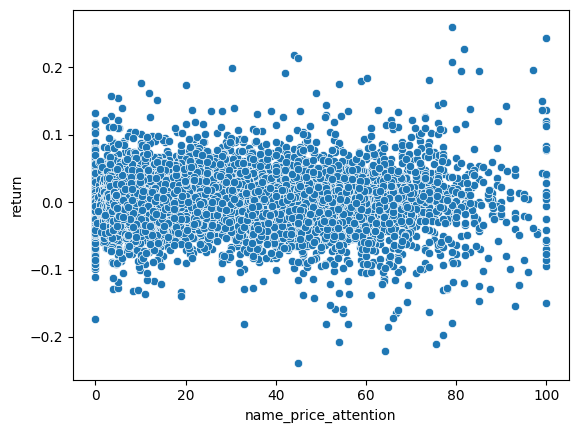

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot name_price_attention against return
sns.scatterplot(x='name_price_attention', y='return', data=df)
plt.show()

- Plot shows no clear linear pattern between the independent and dependent variable.


## Non-transformed OLS Regression with robust covariance type

In [119]:
#X1 = df[['name_price_attention']]
#X2 = df[['name_price_attention', 'mkt_cap', 'volume, volatility']]
#X3 = df[['name_price_attention', 'daily_volatility']]
#X4 = df[['name_price_attention', 'volume']]
#X5 = df[['name_price_attention', 'mkt_cap', 'daily_volatility']]
#X6 = df[['name_price_attention', 'mkt_cap', 'volume']]
#X7 = df[['name_price_attention', 'volume', 'daily_volatility']]
#X8 = df[['name_price_attention', 'mkt_cap', 'volume', 'daily_volatility']]
#X8 = df[['name_price_attention', 'mkt_cap', 'volume', ]]

In [120]:
from statsmodels.formula.api import ols

# Fit the model
model_1 = ols('Q("return") ~ name_price_attention + C(stock_dummy) ', data=df).fit()

# Get robust covariance results
robust_model_1 = model_1.get_robustcov_results()  # solving the heteroskedasticity issue of non robust model 

# Print the summary
robust_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Q("return")   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                    0.8891
Date:                Wed, 06 Mar 2024   Prob (F-statistic):              0.634
Time:                        15:57:43   Log-Likelihood:             1.8544e+05
No. Observations:               70448   AIC:                        -3.708e+05
Df Residuals:                   70419   BIC:                        -3.706e+05
Df Model:                          28                                         
Covariance Type:                  HC1                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0006      0.000      1.462      0.144      -0.000       0.001
C(stock_dummy)[T.1]     -0.0004      0.000     -0.775      0.438      -0.001       0.001
C(stock_dummy)[T.2]     -0.0002      0.001     -0.451      0.652      -0.001       0.001
C(stock_dummy)[T.3]     -0.0002      0.001     -0.295      0.768      -0.001       0.001
C(stock_dummy)[T.4]     -0.0003      0.001     -0.569      0.569      -0.001       0.001
C(stock_dummy)[T.5]   4.916e-05      0.001      0.085      0.932      -0.001       0.001
C(stock_dummy)[T.6]     -0.0005      0.000     -0.981      0.327      -0.001       0.000
C(stock_dummy)[T.7]     -0.0006      0.001     -1.132      0.258      -0.002       0.000
C(stock_dummy)[T.8]     -0.0006      0.001     -1.142      0.253      -0.002       0.000
C(stock_dummy)[T.9]     -0.0002      0.001     -0.456      0.649      -0.001       0.001
C(stock_dummy)[T.10]    -0.0004      0.000     -0.764      0.445      -0.001       0.001
C(stock_dummy)[T.11]    -0.0004      0.000     -0.758      0.449      -0.001       0.001
C(stock_dummy)[T.12]    -0.0012      0.000     -2.452      0.014      -0.002      -0.000
C(stock_dummy)[T.13]    -0.0006      0.001     -1.156      0.248      -0.002       0.000
C(stock_dummy)[T.14]    -0.0004      0.000     -0.858      0.391      -0.001       0.000
C(stock_dummy)[T.15]    -0.0002      0.001     -0.332      0.740      -0.001       0.001
C(stock_dummy)[T.16]    -0.0004      0.000     -0.903      0.367      -0.001       0.000
C(stock_dummy)[T.17]    -0.0002      0.000     -0.533      0.594      -0.001       0.001
C(stock_dummy)[T.18]    -0.0007      0.000     -1.472      0.141      -0.002       0.000
C(stock_dummy)[T.19]    -0.0003      0.000     -0.679      0.497      -0.001       0.001
C(stock_dummy)[T.20]     0.0001      0.000      0.238      0.812      -0.001       0.001
C(stock_dummy)[T.21] -3.835e-05      0.001     -0.072      0.943      -0.001       0.001
C(stock_dummy)[T.22]    -0.0004      0.000     -0.992      0.321      -0.001       0.000
C(stock_dummy)[T.23]    -0.0002      0.000     -0.488      0.625      -0.001       0.001
C(stock_dummy)[T.24]     0.0008      0.001      1.022      0.307      -0.001       0.002
C(stock_dummy)[T.25]     0.0004      0.001      0.709      0.478      -0.001       0.001
C(stock_dummy)[T.26]    -0.0011      0.000     -2.448      0.014      -0.002      -0.000
C(stock_dummy)[T.27]    -0.0006      0.000     -1.253      0.210      -0.001       0.000
name_price_attention   2.36e-05   9.94e-06      2.374      0.018    4.12e-06    4.31e-05
==============================================================================
Omnibus:                    15704.034   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           767936.50

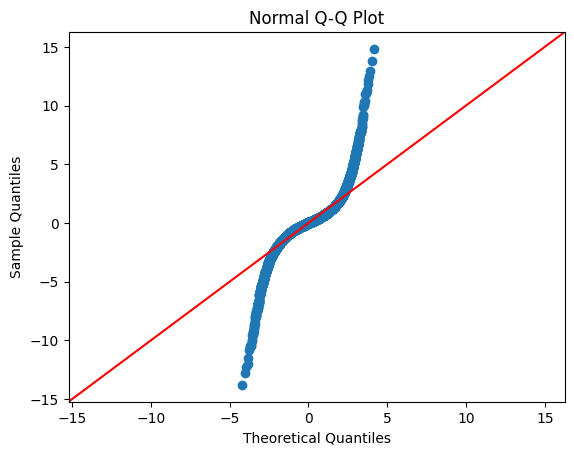

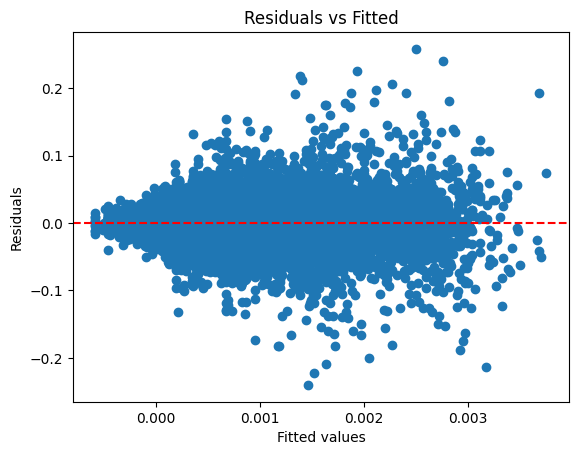

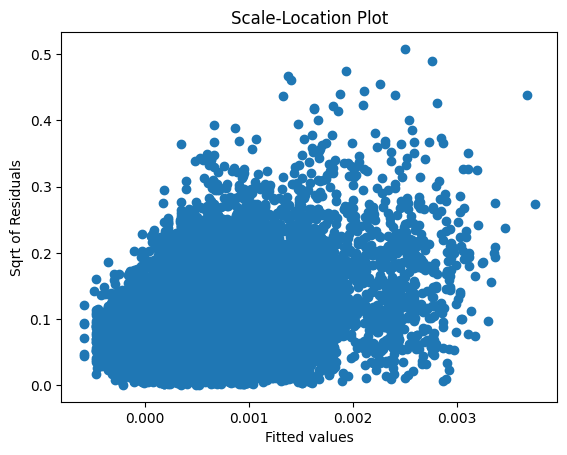

In [121]:
# QQ plot for normality of residuals
fig = sm.qqplot(model_1.resid, line='45', fit=True)
plt.title('Normal Q-Q Plot')
plt.show()

# Residuals vs Fitted for homoscedasticity
plt.scatter(model_1.fittedvalues, model_1.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Scale-Location plot (also called Spread-Location plot)
plt.scatter(model_1.fittedvalues, model_1.resid**0.5)
plt.xlabel('Fitted values')
plt.ylabel('Sqrt of Residuals')
plt.title('Scale-Location Plot')
plt.show()

# Leverage plot to find influential cases
#sm.graphics.influence_plot(model_1, criterion="cooks")
#plt.title('Influence Plot')
#plt.show()

## OLS Regression with log X AND/OR Y

In [122]:
df['log_return'] = np.log(df['return'] + 1)
df['log_name_price_attention'] = np.log(df['name_price_attention'] + 1)

### Exponential OLS Regression with Log_return, robust variance 

Normalization of Skewness: Financial returns are often not symmetrically distributed and can have heavy tails or skewness. Taking the logarithm of returns helps in normalizing the data, making it more symmetric and easier to model with statistical and econometric techniques.

Percentage Changes: The log of returns translates absolute price changes into relative, percentage changes, which are easier to compare across different assets or time periods. This is because the logarithmic function is a monotonic transformation, meaning it preserves the order of the data while scaling differences in a relative manner.

In [123]:
from statsmodels.formula.api import ols

# Fit the model
model_1 = ols('Q("log_return") ~ name_price_attention + C(stock_dummy) ', data=df).fit()

# Get robust covariance results
robust_model_1 = model_1.get_robustcov_results()

# Print the summary
robust_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q("log_return")   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6288
Date:                Wed, 06 Mar 2024   Prob (F-statistic):              0.936
Time:                        15:57:43   Log-Likelihood:             1.8539e+05
No. Observations:               70448   AIC:                        -3.707e+05
Df Residuals:                   70419   BIC:                        -3.705e+05
Df Model:                          28                                         
Covariance Type:                  HC1                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0007      0.000      1.653      0.098      -0.000       0.001
C(stock_dummy)[T.1]     -0.0004      0.000     -0.832      0.405      -0.001       0.001
C(stock_dummy)[T.2]     -0.0004      0.001     -0.774      0.439      -0.001       0.001
C(stock_dummy)[T.3]     -0.0005      0.001     -0.734      0.463      -0.002       0.001
C(stock_dummy)[T.4]     -0.0003      0.001     -0.651      0.515      -0.001       0.001
C(stock_dummy)[T.5]     -0.0002      0.001     -0.287      0.774      -0.001       0.001
C(stock_dummy)[T.6]     -0.0005      0.000     -0.974      0.330      -0.001       0.000
C(stock_dummy)[T.7]     -0.0007      0.001     -1.253      0.210      -0.002       0.000
C(stock_dummy)[T.8]     -0.0007      0.001     -1.369      0.171      -0.002       0.000
C(stock_dummy)[T.9]     -0.0004      0.001     -0.739      0.460      -0.001       0.001
C(stock_dummy)[T.10]    -0.0003      0.000     -0.644      0.520      -0.001       0.001
C(stock_dummy)[T.11]    -0.0004      0.000     -0.853      0.393      -0.001       0.001
C(stock_dummy)[T.12]    -0.0010      0.000     -2.055      0.040      -0.002   -4.56e-05
C(stock_dummy)[T.13]    -0.0006      0.001     -1.163      0.245      -0.002       0.000
C(stock_dummy)[T.14]    -0.0004      0.000     -0.999      0.318      -0.001       0.000
C(stock_dummy)[T.15]    -0.0003      0.001     -0.537      0.591      -0.001       0.001
C(stock_dummy)[T.16]    -0.0005      0.000     -1.075      0.282      -0.001       0.000
C(stock_dummy)[T.17]    -0.0003      0.000     -0.601      0.548      -0.001       0.001
C(stock_dummy)[T.18]    -0.0008      0.000     -1.624      0.104      -0.002       0.000
C(stock_dummy)[T.19]    -0.0004      0.000     -0.787      0.432      -0.001       0.001
C(stock_dummy)[T.20]  8.775e-05      0.000      0.178      0.859      -0.001       0.001
C(stock_dummy)[T.21]    -0.0003      0.001     -0.470      0.638      -0.001       0.001
C(stock_dummy)[T.22]    -0.0005      0.000     -1.054      0.292      -0.001       0.000
C(stock_dummy)[T.23]    -0.0004      0.000     -0.733      0.463      -0.001       0.001
C(stock_dummy)[T.24]     0.0003      0.001      0.431      0.667      -0.001       0.002
C(stock_dummy)[T.25]     0.0002      0.001      0.318      0.751      -0.001       0.001
C(stock_dummy)[T.26]    -0.0009      0.000     -2.132      0.033      -0.002   -7.43e-05
C(stock_dummy)[T.27]    -0.0005      0.000     -1.197      0.231      -0.001       0.000
name_price_attention  1.291e-05   9.92e-06      1.301      0.193   -6.54e-06    3.24e-05
==============================================================================
Omnibus:                    17150.378   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           812503.68

### Logrithmic OLS Regression with robust variance

Dealing with Scaling Issues: Attention scores, particularly those scaled from 0 to 100, can suffer from scaling issues where changes at different levels of the scale are not directly comparable. For example, an increase from 10 to 20 might not have the same practical significance as an increase from 80 to 90, even though both are increases of 10 points. Taking the logarithm helps mitigate this issue by transforming the scale into one where changes are more uniformly interpretable.

Diminishing Returns to Attention: The concept of diminishing returns might apply to attention as well. The difference in impact between an attention score of 90 and 100 is likely less significant than the difference between 10 and 20, even though both represent a 10-point increase. The logarithmic scale naturally reflects diminishing sensitivity as attention scores increase.

Linearizing Exponential Relationships: If the underlying relationship between attention and some outcome of interest (like sales, popularity, etc.) is exponential, taking the logarithm of attention can help linearize this relationship, making it easier to model with linear regression techniques. This is often the case in situations where a little bit of attention can lead to a large increase in the outcome, but additional attention yields progressively smaller increases.

In [124]:
from statsmodels.formula.api import ols

# Fit the model
model_1 = ols('Q("return") ~ log_name_price_attention + C(stock_dummy) ', data=df).fit()

# Get robust covariance results
robust_model_1 = model_1.get_robustcov_results()

# Print the summary
robust_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Q("return")   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.161
Date:                Wed, 06 Mar 2024   Prob (F-statistic):              0.254
Time:                        15:57:44   Log-Likelihood:             1.8544e+05
No. Observations:               70448   AIC:                        -3.708e+05
Df Residuals:                   70419   BIC:                        -3.706e+05
Df Model:                          28                                         
Covariance Type:                  HC1                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.0004      0.000      0.875      0.381      -0.000       0.001
C(stock_dummy)[T.1]         -0.0003      0.000     -0.526      0.599      -0.001       0.001
C(stock_dummy)[T.2]         -0.0001      0.001     -0.271      0.786      -0.001       0.001
C(stock_dummy)[T.3]         -0.0002      0.001     -0.363      0.717      -0.001       0.001
C(stock_dummy)[T.4]         -0.0002      0.001     -0.448      0.654      -0.001       0.001
C(stock_dummy)[T.5]          0.0001      0.001      0.212      0.832      -0.001       0.001
C(stock_dummy)[T.6]         -0.0004      0.000     -0.935      0.350      -0.001       0.000
C(stock_dummy)[T.7]         -0.0006      0.001     -1.193      0.233      -0.002       0.000
C(stock_dummy)[T.8]         -0.0007      0.000     -1.347      0.178      -0.002       0.000
C(stock_dummy)[T.9]         -0.0001      0.001     -0.272      0.785      -0.001       0.001
C(stock_dummy)[T.10]        -0.0003      0.000     -0.692      0.489      -0.001       0.001
C(stock_dummy)[T.11]        -0.0003      0.000     -0.659      0.510      -0.001       0.001
C(stock_dummy)[T.12]        -0.0010      0.000     -2.177      0.029      -0.002      -0.000
C(stock_dummy)[T.13]        -0.0005      0.001     -0.949      0.342      -0.002       0.001
C(stock_dummy)[T.14]        -0.0003      0.000     -0.588      0.556      -0.001       0.001
C(stock_dummy)[T.15]     -5.341e-05      0.001     -0.105      0.916      -0.001       0.001
C(stock_dummy)[T.16]        -0.0003      0.000     -0.600      0.548      -0.001       0.001
C(stock_dummy)[T.17]        -0.0002      0.000     -0.520      0.603      -0.001       0.001
C(stock_dummy)[T.18]        -0.0007      0.000     -1.590      0.112      -0.002       0.000
C(stock_dummy)[T.19]        -0.0004      0.000     -0.783      0.434      -0.001       0.001
C(stock_dummy)[T.20]         0.0001      0.000      0.233      0.816      -0.001       0.001
C(stock_dummy)[T.21]     -2.701e-05      0.001     -0.052      0.959      -0.001       0.001
C(stock_dummy)[T.22]        -0.0003      0.000     -0.649      0.516      -0.001       0.001
C(stock_dummy)[T.23]     -6.214e-05      0.000     -0.128      0.898      -0.001       0.001
C(stock_dummy)[T.24]         0.0009      0.001      1.133      0.257      -0.001       0.002
C(stock_dummy)[T.25]         0.0006      0.001      1.108      0.268      -0.000       0.002
C(stock_dummy)[T.26]        -0.0010      0.000     -2.331      0.020      -0.002      -0.000
C(stock_dummy)[T.27]        -0.0006      0.000     -1.373      0.170      -0.001       0.000
log_name_price_attention     0.0003   6.96e-05      3.692      0.000       0.000       0.000
==============================================================================
Omnibus:                    

### Power OLS Model with Log Return and Log X, robust variance

In [125]:
from statsmodels.formula.api import ols

# Fit the model
model_1 = ols('Q("log_return") ~ log_name_price_attention + C(stock_dummy) ', data=df).fit()

# Get robust covariance results
robust_model_1 = model_1.get_robustcov_results()

# Print the summary
robust_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q("log_return")   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8179
Date:                Wed, 06 Mar 2024   Prob (F-statistic):              0.738
Time:                        15:57:44   Log-Likelihood:             1.8539e+05
No. Observations:               70448   AIC:                        -3.707e+05
Df Residuals:                   70419   BIC:                        -3.705e+05
Df Model:                          28                                         
Covariance Type:                  HC1                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.0004      0.000      1.016      0.310      -0.000       0.001
C(stock_dummy)[T.1]         -0.0003      0.000     -0.601      0.548      -0.001       0.001
C(stock_dummy)[T.2]         -0.0003      0.001     -0.542      0.588      -0.001       0.001
C(stock_dummy)[T.3]         -0.0004      0.001     -0.715      0.474      -0.002       0.001
C(stock_dummy)[T.4]         -0.0003      0.001     -0.541      0.589      -0.001       0.001
C(stock_dummy)[T.5]      -6.276e-05      0.001     -0.109      0.913      -0.001       0.001
C(stock_dummy)[T.6]         -0.0004      0.000     -0.915      0.360      -0.001       0.000
C(stock_dummy)[T.7]         -0.0007      0.001     -1.263      0.207      -0.002       0.000
C(stock_dummy)[T.8]         -0.0007      0.000     -1.431      0.152      -0.002       0.000
C(stock_dummy)[T.9]         -0.0003      0.001     -0.502      0.615      -0.001       0.001
C(stock_dummy)[T.10]        -0.0003      0.000     -0.601      0.548      -0.001       0.001
C(stock_dummy)[T.11]        -0.0003      0.000     -0.701      0.483      -0.001       0.001
C(stock_dummy)[T.12]        -0.0009      0.000     -1.978      0.048      -0.002   -8.29e-06
C(stock_dummy)[T.13]        -0.0006      0.001     -1.046      0.296      -0.002       0.000
C(stock_dummy)[T.14]        -0.0003      0.000     -0.674      0.500      -0.001       0.001
C(stock_dummy)[T.15]        -0.0001      0.001     -0.287      0.774      -0.001       0.001
C(stock_dummy)[T.16]        -0.0003      0.000     -0.716      0.474      -0.001       0.001
C(stock_dummy)[T.17]        -0.0002      0.000     -0.501      0.616      -0.001       0.001
C(stock_dummy)[T.18]        -0.0008      0.000     -1.616      0.106      -0.002       0.000
C(stock_dummy)[T.19]        -0.0003      0.000     -0.767      0.443      -0.001       0.001
C(stock_dummy)[T.20]         0.0001      0.000      0.207      0.836      -0.001       0.001
C(stock_dummy)[T.21]        -0.0002      0.001     -0.316      0.752      -0.001       0.001
C(stock_dummy)[T.22]        -0.0003      0.000     -0.703      0.482      -0.001       0.001
C(stock_dummy)[T.23]        -0.0002      0.000     -0.345      0.730      -0.001       0.001
C(stock_dummy)[T.24]         0.0004      0.001      0.517      0.605      -0.001       0.002
C(stock_dummy)[T.25]         0.0004      0.001      0.770      0.441      -0.001       0.001
C(stock_dummy)[T.26]        -0.0009      0.000     -2.091      0.037      -0.002   -5.61e-05
C(stock_dummy)[T.27]        -0.0005      0.000     -1.242      0.214      -0.001       0.000
log_name_price_attention     0.0002   6.96e-05      2.638      0.008    4.72e-05       0.000
==============================================================================
Omnibus:                    

In summary, this model appears to have issues with the normality of residuals, explanatory power, and overall significance, indicating that it might need to be re-specified with different variables, transformations, or perhaps a different modeling approach altogether.

In [126]:
anomalies_df.head()

,date,permno,ticker,price,volume,return,high,low,open,avg_price,...,daily_volatility,stock_dummy,revenue,total_assets,earnings_per_share,book_to_market,dt_date,jan_dummy,monday_dummy,annual_rep_release
0,2014-01-02,10107,MSFT,37.16,30423757.0,-0.006683,37.40,37.10,37.350,37.25,...,0.30,20,NaN,NaN,NaN,NaN,2014-01-02,1,0,0
1,2014-01-03,10107,MSFT,36.91,30944370.0,-0.006728,37.22,36.60,37.200,36.91,...,0.62,20,NaN,NaN,NaN,NaN,2014-01-03,1,0,0
2,2014-01-06,10107,MSFT,36.13,43111355.0,-0.021133,36.89,36.11,36.850,36.50,...,0.78,20,NaN,NaN,NaN,NaN,2014-01-06,1,1,0
3,2014-01-07,10107,MSFT,36.41,35478667.0,0.007750,36.49,36.21,36.325,36.35,...,0.28,20,NaN,NaN,NaN,NaN,2014-01-07,1,0,0
4,2014-01-08,10107,MSFT,35.76,59452427.0,-0.017852,36.14,35.58,36.000,35.86,...,0.56,20,NaN,NaN,NaN,NaN,2014-01-08,1,0,0


In [127]:
# Fit the model
model_1 = ols('Q("return") ~ name_price_attention + C(stock_dummy) + mkt_cap + volume + C(jan_dummy) + C(monday_dummy) + C(annual_rep_release)', data=anomalies_df).fit()

# Get robust covariance results
robust_model_1 = model_1.get_robustcov_results()

# Print the summary
robust_model_1.summary()

/Users/christel/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 31
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Q("return")   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.056
Date:                Wed, 06 Mar 2024   Prob (F-statistic):              0.382
Time:                        15:57:45   Log-Likelihood:             1.8546e+05
No. Observations:               70448   AIC:                        -3.709e+05
Df Residuals:                   70414   BIC:                        -3.705e+05
Df Model:                          33                                         
Covariance Type:                  HC1                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.0015      0.001      2.185      0.029       0.000       0.003
C(stock_dummy)[T.1]           -0.0013      0.001     -1.826      0.068      -0.003    9.68e-05
C(stock_dummy)[T.2]           -0.0011      0.001     -1.473      0.141      -0.003       0.000
C(stock_dummy)[T.3]           -0.0009      0.001     -1.153      0.249      -0.002       0.001
C(stock_dummy)[T.4]           -0.0012      0.001     -1.586      0.113      -0.003       0.000
C(stock_dummy)[T.5]           -0.0008      0.001     -0.979      0.327      -0.002       0.001
C(stock_dummy)[T.6]           -0.0007      0.001     -1.177      0.239      -0.002       0.000
C(stock_dummy)[T.7]           -0.0014      0.001     -2.032      0.042      -0.003   -5.04e-05
C(stock_dummy)[T.8]           -0.0013      0.001     -1.877      0.061      -0.003    5.72e-05
C(stock_dummy)[T.9]           -0.0011      0.001     -1.534      0.125      -0.003       0.000
C(stock_dummy)[T.10]          -0.0014      0.001     -1.935      0.053      -0.003    1.74e-05
C(stock_dummy)[T.11]          -0.0013      0.001     -1.815      0.070      -0.003       0.000
C(stock_dummy)[T.12]          -0.0022      0.001     -2.895      0.004      -0.004      -0.001
C(stock_dummy)[T.13]          -0.0007      0.001     -1.038      0.299      -0.002       0.001
C(stock_dummy)[T.14]          -0.0013      0.001     -1.995      0.046      -0.002   -2.22e-05
C(stock_dummy)[T.15]          -0.0008      0.001     -1.257      0.209      -0.002       0.000
C(stock_dummy)[T.16]          -0.0009      0.001     -1.562      0.118      -0.002       0.000
C(stock_dummy)[T.17]          -0.0011      0.001     -1.672      0.094      -0.002       0.000
C(stock_dummy)[T.18]          -0.0016      0.001     -2.259      0.024      -0.003      -0.000
C(stock_dummy)[T.19]          -0.0010      0.001     -1.558      0.119      -0.002       0.000
C(stock_dummy)[T.20]          -0.0005      0.001     -0.939      0.348      -0.002       0.001
C(stock_dummy)[T.21]          -0.0007      0.001     -1.039      0.299      -0.002       0.001
C(stock_dummy)[T.22]          -0.0013      0.001     -1.984      0.047      -0.002   -1.51e-05
C(stock_dummy)[T.23]          -0.0011      0.001     -1.556      0.120      -0.003       0.000
C(stock_dummy)[T.24]           0.0006      0.001      0.714      0.475      -0.001       0.002
C(stock_dummy)[T.25]          -0.0005      0.001     -0.778      0.436      -0.002       0.001
C(stock_dummy)[T.26]          -0.0016      0.001     -2.527      0.012      -0.003      -0.000
C(stock_dummy)[T.27]          -0.0015      0.001     -2.204      0.027      -0.003      -0.000
C(jan_dummy)[T.1]             -0.0004      0.000     -1.576      0.115      -0.001    9.24e-05
C(monday_dummy)[T.1]           0.0002      

not provide a good fit to the data. The tests indicate that the residuals are not normally distributed and that the model explains an insignificant portion of the variance in returns. The very high condition number is particularly concerning as it suggests that multicollinearity is likely influencing the regression estimates, which might mean that the regression coefficients are unstable and unreliable. This could also mean that the model is overfitted, with too many predictors and not enough signal.

In [128]:
# check if there is mulitcollinearity between the independent variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = anomalies_df[['name_price_attention', 'stock_dummy' ,  'mkt_cap' , 'volume' , 'jan_dummy' , 'monday_dummy',  'annual_rep_release']]

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

# Create a column in the dataframe that will contain the names of all the feature variables
vif["Features"] = X.columns

# Create a column in the dataframe that will contain the VIF values of the feature variables
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the dataframe
print(vif)

               Features       VIF
0  name_price_attention  1.870184
1           stock_dummy  1.702969
2               mkt_cap  2.119586
3                volume  2.237787
4             jan_dummy  1.070516
5          monday_dummy  1.172346
6    annual_rep_release  1.009481


Since all values are < 3 we can conclude that there is no multicolinarity present between our independent variables. 

In [129]:
anomalies_df['log_return'] = np.log(anomalies_df['return'] + 1)
# Fit the model
model_1 = ols('Q("log_return") ~ name_price_attention + C(stock_dummy) + mkt_cap + volume + C(jan_dummy) + C(monday_dummy) + C(annual_rep_release)', data=anomalies_df).fit()

# Get robust covariance results
robust_model_1 = model_1.get_robustcov_results()

# Print the summary
robust_model_1.summary()

/Users/christel/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 31
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q("log_return")   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                    0.8551
Date:                Wed, 06 Mar 2024   Prob (F-statistic):              0.697
Time:                        15:57:46   Log-Likelihood:             1.8543e+05
No. Observations:               70448   AIC:                        -3.708e+05
Df Residuals:                   70414   BIC:                        -3.705e+05
Df Model:                          33                                         
Covariance Type:                  HC1                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.0016      0.001      2.406      0.016       0.000       0.003
C(stock_dummy)[T.1]           -0.0014      0.001     -1.990      0.047      -0.003   -2.18e-05
C(stock_dummy)[T.2]           -0.0013      0.001     -1.801      0.072      -0.003       0.000
C(stock_dummy)[T.3]           -0.0012      0.001     -1.555      0.120      -0.003       0.000
C(stock_dummy)[T.4]           -0.0013      0.001     -1.736      0.083      -0.003       0.000
C(stock_dummy)[T.5]           -0.0010      0.001     -1.338      0.181      -0.003       0.000
C(stock_dummy)[T.6]           -0.0007      0.001     -1.044      0.296      -0.002       0.001
C(stock_dummy)[T.7]           -0.0016      0.001     -2.227      0.026      -0.003      -0.000
C(stock_dummy)[T.8]           -0.0014      0.001     -2.106      0.035      -0.003      -0.000
C(stock_dummy)[T.9]           -0.0013      0.001     -1.840      0.066      -0.003    8.74e-05
C(stock_dummy)[T.10]          -0.0014      0.001     -2.020      0.043      -0.003   -4.27e-05
C(stock_dummy)[T.11]          -0.0014      0.001     -1.998      0.046      -0.003   -2.69e-05
C(stock_dummy)[T.12]          -0.0021      0.001     -2.775      0.006      -0.004      -0.001
C(stock_dummy)[T.13]          -0.0006      0.001     -0.848      0.397      -0.002       0.001
C(stock_dummy)[T.14]          -0.0014      0.001     -2.267      0.023      -0.003      -0.000
C(stock_dummy)[T.15]          -0.0009      0.001     -1.485      0.137      -0.002       0.000
C(stock_dummy)[T.16]          -0.0010      0.001     -1.693      0.090      -0.002       0.000
C(stock_dummy)[T.17]          -0.0013      0.001     -1.840      0.066      -0.003     8.2e-05
C(stock_dummy)[T.18]          -0.0018      0.001     -2.473      0.013      -0.003      -0.000
C(stock_dummy)[T.19]          -0.0011      0.001     -1.694      0.090      -0.002       0.000
C(stock_dummy)[T.20]          -0.0007      0.001     -1.251      0.211      -0.002       0.000
C(stock_dummy)[T.21]          -0.0010      0.001     -1.389      0.165      -0.002       0.000
C(stock_dummy)[T.22]          -0.0014      0.001     -2.155      0.031      -0.003      -0.000
C(stock_dummy)[T.23]          -0.0013      0.001     -1.818      0.069      -0.003       0.000
C(stock_dummy)[T.24]           0.0003      0.001      0.298      0.766      -0.001       0.002
C(stock_dummy)[T.25]          -0.0009      0.001     -1.223      0.221      -0.002       0.001
C(stock_dummy)[T.26]          -0.0015      0.001     -2.295      0.022      -0.003      -0.000
C(stock_dummy)[T.27]          -0.0015      0.001     -2.318      0.020      -0.003      -0.000
C(jan_dummy)[T.1]             -0.0004      0.000     -1.515      0.130      -0.001       0.000
C(monday_dummy)[T.1]           0.0001      

Switching to log returns has not materially changed the output of your regression model. The model's explanatory power is still very low, and the statistical tests indicate that the assumptions for an ideal OLS model, such as normal distribution of residuals, are not met. The presence of high kurtosis and a high condition number suggests that there may be outliers affecting the model and issues with multicollinearity, respectively.

In [130]:
anomalies_df['log_name_price_attention'] = np.log(anomalies_df['name_price_attention'] + 1)

# Fit the model
model_1 = ols('Q("log_return") ~ log_name_price_attention + C(stock_dummy) + mkt_cap + volume + C(jan_dummy) + C(monday_dummy) + C(annual_rep_release)', data=anomalies_df).fit()

# Get robust covariance results
robust_model_1 = model_1.get_robustcov_results()

# Print the summary
robust_model_1.summary()

/Users/christel/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 31
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q("log_return")   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.028
Date:                Wed, 06 Mar 2024   Prob (F-statistic):              0.423
Time:                        15:57:46   Log-Likelihood:             1.8543e+05
No. Observations:               70448   AIC:                        -3.708e+05
Df Residuals:                   70414   BIC:                        -3.705e+05
Df Model:                          33                                         
Covariance Type:                  HC1                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.0011      0.001      1.665      0.096      -0.000       0.002
C(stock_dummy)[T.1]           -0.0011      0.001     -1.509      0.131      -0.002       0.000
C(stock_dummy)[T.2]           -0.0010      0.001     -1.319      0.187      -0.002       0.000
C(stock_dummy)[T.3]           -0.0010      0.001     -1.265      0.206      -0.003       0.001
C(stock_dummy)[T.4]           -0.0010      0.001     -1.338      0.181      -0.002       0.000
C(stock_dummy)[T.5]           -0.0007      0.001     -0.925      0.355      -0.002       0.001
C(stock_dummy)[T.6]           -0.0004      0.001     -0.717      0.474      -0.002       0.001
C(stock_dummy)[T.7]           -0.0013      0.001     -1.916      0.055      -0.003    3.09e-05
C(stock_dummy)[T.8]           -0.0013      0.001     -1.877      0.061      -0.003    5.72e-05
C(stock_dummy)[T.9]           -0.0010      0.001     -1.354      0.176      -0.002       0.000
C(stock_dummy)[T.10]          -0.0011      0.001     -1.651      0.099      -0.003       0.000
C(stock_dummy)[T.11]          -0.0011      0.001     -1.569      0.117      -0.002       0.000
C(stock_dummy)[T.12]          -0.0017      0.001     -2.429      0.015      -0.003      -0.000
C(stock_dummy)[T.13]          -0.0003      0.001     -0.456      0.648      -0.002       0.001
C(stock_dummy)[T.14]          -0.0011      0.001     -1.732      0.083      -0.002       0.000
C(stock_dummy)[T.15]          -0.0006      0.001     -1.003      0.316      -0.002       0.001
C(stock_dummy)[T.16]          -0.0007      0.001     -1.140      0.254      -0.002       0.000
C(stock_dummy)[T.17]          -0.0010      0.001     -1.453      0.146      -0.002       0.000
C(stock_dummy)[T.18]          -0.0015      0.001     -2.160      0.031      -0.003      -0.000
C(stock_dummy)[T.19]          -0.0009      0.001     -1.400      0.162      -0.002       0.000
C(stock_dummy)[T.20]          -0.0006      0.001     -1.090      0.276      -0.002       0.000
C(stock_dummy)[T.21]          -0.0007      0.001     -1.032      0.302      -0.002       0.001
C(stock_dummy)[T.22]          -0.0010      0.001     -1.589      0.112      -0.002       0.000
C(stock_dummy)[T.23]          -0.0009      0.001     -1.225      0.221      -0.002       0.001
C(stock_dummy)[T.24]           0.0005      0.001      0.593      0.553      -0.001       0.002
C(stock_dummy)[T.25]          -0.0005      0.001     -0.633      0.527      -0.002       0.001
C(stock_dummy)[T.26]          -0.0012      0.001     -2.007      0.045      -0.002   -2.78e-05
C(stock_dummy)[T.27]          -0.0013      0.001     -2.057      0.040      -0.003   -6.33e-05
C(jan_dummy)[T.1]             -0.0004      0.000     -1.554      0.120      -0.001    9.78e-05
C(monday_dummy)[T.1]           0.0001      

The changes made by logging attention do not seem to have had a significant impact on the overall fit and quality of the regression model. The model still lacks explanatory power, the residuals do not meet the assumption of normality, and multicollinearity remains a concern.

In [131]:
# Fit the model
model_1 = ols('Q("return") ~ log_name_price_attention + C(stock_dummy) + mkt_cap + volume + C(jan_dummy) + C(monday_dummy) + C(annual_rep_release)', data=anomalies_df).fit()

# Get robust covariance results
robust_model_1 = model_1.get_robustcov_results()

# Print the summary
robust_model_1.summary()

/Users/christel/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 31
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Q("return")   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.274
Date:                Wed, 06 Mar 2024   Prob (F-statistic):              0.141
Time:                        15:57:47   Log-Likelihood:             1.8546e+05
No. Observations:               70448   AIC:                        -3.708e+05
Df Residuals:                   70414   BIC:                        -3.705e+05
Df Model:                          33                                         
Covariance Type:                  HC1                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.0008      0.001      1.190      0.234      -0.001       0.002
C(stock_dummy)[T.1]           -0.0008      0.001     -1.067      0.286      -0.002       0.001
C(stock_dummy)[T.2]           -0.0006      0.001     -0.781      0.435      -0.002       0.001
C(stock_dummy)[T.3]           -0.0006      0.001     -0.717      0.473      -0.002       0.001
C(stock_dummy)[T.4]           -0.0007      0.001     -0.919      0.358      -0.002       0.001
C(stock_dummy)[T.5]           -0.0003      0.001     -0.369      0.712      -0.002       0.001
C(stock_dummy)[T.6]           -0.0004      0.001     -0.622      0.534      -0.002       0.001
C(stock_dummy)[T.7]           -0.0011      0.001     -1.510      0.131      -0.002       0.000
C(stock_dummy)[T.8]           -0.0010      0.001     -1.496      0.135      -0.002       0.000
C(stock_dummy)[T.9]           -0.0006      0.001     -0.830      0.406      -0.002       0.001
C(stock_dummy)[T.10]          -0.0009      0.001     -1.288      0.198      -0.002       0.000
C(stock_dummy)[T.11]          -0.0008      0.001     -1.147      0.251      -0.002       0.001
C(stock_dummy)[T.12]          -0.0015      0.001     -2.163      0.031      -0.003      -0.000
C(stock_dummy)[T.13]          -0.0002      0.001     -0.383      0.702      -0.002       0.001
C(stock_dummy)[T.14]          -0.0008      0.001     -1.251      0.211      -0.002       0.000
C(stock_dummy)[T.15]          -0.0004      0.001     -0.565      0.572      -0.002       0.001
C(stock_dummy)[T.16]          -0.0005      0.001     -0.788      0.431      -0.002       0.001
C(stock_dummy)[T.17]          -0.0007      0.001     -1.065      0.287      -0.002       0.001
C(stock_dummy)[T.18]          -0.0012      0.001     -1.751      0.080      -0.003       0.000
C(stock_dummy)[T.19]          -0.0007      0.001     -1.079      0.281      -0.002       0.001
C(stock_dummy)[T.20]          -0.0004      0.001     -0.704      0.482      -0.001       0.001
C(stock_dummy)[T.21]          -0.0004      0.001     -0.531      0.596      -0.002       0.001
C(stock_dummy)[T.22]          -0.0007      0.001     -1.164      0.244      -0.002       0.001
C(stock_dummy)[T.23]          -0.0005      0.001     -0.717      0.474      -0.002       0.001
C(stock_dummy)[T.24]           0.0010      0.001      1.179      0.238      -0.001       0.003
C(stock_dummy)[T.25]        1.591e-07      0.001      0.000      1.000      -0.001       0.001
C(stock_dummy)[T.26]          -0.0011      0.001     -1.939      0.053      -0.002    1.24e-05
C(stock_dummy)[T.27]          -0.0011      0.001     -1.732      0.083      -0.002       0.000
C(jan_dummy)[T.1]             -0.0004      0.000     -1.635      0.102      -0.001    7.83e-05
C(monday_dummy)[T.1]           0.0002      

Removing the anomalies January effect, Monday effect and Annual report Release to reduce multicolinarity. 

In [132]:
print(anomalies_df.columns)

Index(['date', 'permno', 'ticker', 'price', 'volume', 'return', 'high', 'low',
       'open', 'avg_price', 'mkt_cap', 'pct_return', 'name_price_attention',
       'daily_volatility', 'stock_dummy', 'revenue', 'total_assets',
       'earnings_per_share', 'book_to_market', 'dt_date', 'jan_dummy',
       'monday_dummy', 'annual_rep_release', 'log_return',
       'log_name_price_attention'],
      dtype='object')


In [133]:
# Fit the model
model_all = ols('Q("return") ~ C(stock_dummy) + name_price_attention ', data=anomalies_df).fit()

# Get robust covariance results
model_all = model_all.get_robustcov_results()

# Print the summary
model_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Q("return")   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                    0.8891
Date:                Wed, 06 Mar 2024   Prob (F-statistic):              0.634
Time:                        15:57:47   Log-Likelihood:             1.8544e+05
No. Observations:               70448   AIC:                        -3.708e+05
Df Residuals:                   70419   BIC:                        -3.706e+05
Df Model:                          28                                         
Covariance Type:                  HC1                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0006      0.000      1.462      0.144      -0.000       0.001
C(stock_dummy)[T.1]     -0.0004      0.000     -0.775      0.438      -0.001       0.001
C(stock_dummy)[T.2]     -0.0002      0.001     -0.451      0.652      -0.001       0.001
C(stock_dummy)[T.3]     -0.0002      0.001     -0.295      0.768      -0.001       0.001
C(stock_dummy)[T.4]     -0.0003      0.001     -0.569      0.569      -0.001       0.001
C(stock_dummy)[T.5]   4.916e-05      0.001      0.085      0.932      -0.001       0.001
C(stock_dummy)[T.6]     -0.0005      0.000     -0.981      0.327      -0.001       0.000
C(stock_dummy)[T.7]     -0.0006      0.001     -1.132      0.258      -0.002       0.000
C(stock_dummy)[T.8]     -0.0006      0.001     -1.142      0.253      -0.002       0.000
C(stock_dummy)[T.9]     -0.0002      0.001     -0.456      0.649      -0.001       0.001
C(stock_dummy)[T.10]    -0.0004      0.000     -0.764      0.445      -0.001       0.001
C(stock_dummy)[T.11]    -0.0004      0.000     -0.758      0.449      -0.001       0.001
C(stock_dummy)[T.12]    -0.0012      0.000     -2.452      0.014      -0.002      -0.000
C(stock_dummy)[T.13]    -0.0006      0.001     -1.156      0.248      -0.002       0.000
C(stock_dummy)[T.14]    -0.0004      0.000     -0.858      0.391      -0.001       0.000
C(stock_dummy)[T.15]    -0.0002      0.001     -0.332      0.740      -0.001       0.001
C(stock_dummy)[T.16]    -0.0004      0.000     -0.903      0.367      -0.001       0.000
C(stock_dummy)[T.17]    -0.0002      0.000     -0.533      0.594      -0.001       0.001
C(stock_dummy)[T.18]    -0.0007      0.000     -1.472      0.141      -0.002       0.000
C(stock_dummy)[T.19]    -0.0003      0.000     -0.679      0.497      -0.001       0.001
C(stock_dummy)[T.20]     0.0001      0.000      0.238      0.812      -0.001       0.001
C(stock_dummy)[T.21] -3.835e-05      0.001     -0.072      0.943      -0.001       0.001
C(stock_dummy)[T.22]    -0.0004      0.000     -0.992      0.321      -0.001       0.000
C(stock_dummy)[T.23]    -0.0002      0.000     -0.488      0.625      -0.001       0.001
C(stock_dummy)[T.24]     0.0008      0.001      1.022      0.307      -0.001       0.002
C(stock_dummy)[T.25]     0.0004      0.001      0.709      0.478      -0.001       0.001
C(stock_dummy)[T.26]    -0.0011      0.000     -2.448      0.014      -0.002      -0.000
C(stock_dummy)[T.27]    -0.0006      0.000     -1.253      0.210      -0.001       0.000
name_price_attention   2.36e-05   9.94e-06      2.374      0.018    4.12e-06    4.31e-05
==============================================================================
Omnibus:                    15704.034   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           767936.50

# Using Hubert T norm to deal with the outliers. 

In [134]:
import statsmodels.formula.api as smf
formula = 'Q("return") ~ C(stock_dummy) + name_price_attention'

model = smf.rlm(formula, data=anomalies_df, M=sm.robust.norms.HuberT())
results = model.fit()

# Print the summary
print(results.summary())


                    Robust linear Model Regression Results                    
Dep. Variable:            Q("return")   No. Observations:                70448
Model:                            RLM   Df Residuals:                    70419
Method:                          IRLS   Df Model:                           28
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 06 Mar 2024                                         
Time:                        15:57:51                                         
No. Iterations:                    28                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0007 

The robust regression shows that attention does have a statistically significant influence on the dependent variable but it seems to be very small. 

In [135]:
formula = 'Q("return") ~ C(stock_dummy) + log_name_price_attention'

model = smf.rlm(formula, data=anomalies_df, M=sm.robust.norms.HuberT())
results = model.fit()

# Print the summary
print(results.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:            Q("return")   No. Observations:                70448
Model:                            RLM   Df Residuals:                    70419
Method:                          IRLS   Df Model:                           28
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 06 Mar 2024                                         
Time:                        15:57:53                                         
No. Iterations:                    28                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

<Axes: xlabel='log_name_price_attention', ylabel='return'>

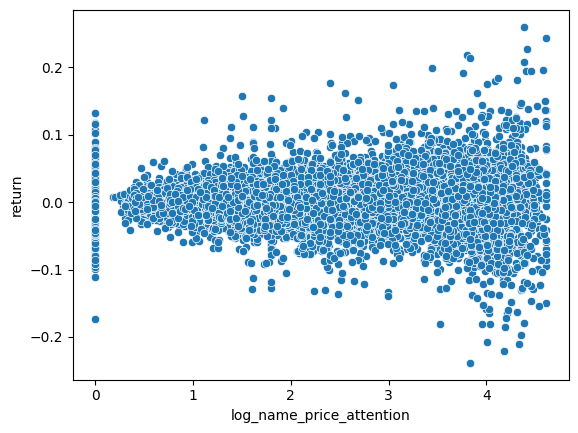

In [136]:
## plot log returns agains name_price_attention
import numpy as np

# Calculate log returns
df['log_return'] = np.log(df['return'] + 1)

# Plot name_price_attention against log_return
sns.scatterplot(x='log_name_price_attention', y='return', data=df)

The log transformation may bring the measurement scales of the independent variables to a range that is more comparable to the dependent variable, which is why the value of coefficient of attention increased. This can sometimes improve the performance of the regression model, even if the relationship is not linear.

In [137]:
formula = 'Q("log_return") ~ C(stock_dummy) + log_name_price_attention'

model = smf.rlm(formula, data=anomalies_df, M=sm.robust.norms.HuberT())
results = model.fit()

# Print the summary
print(results.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:        Q("log_return")   No. Observations:                70448
Model:                            RLM   Df Residuals:                    70419
Method:                          IRLS   Df Model:                           28
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 06 Mar 2024                                         
Time:                        15:57:55                                         
No. Iterations:                    29                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

From the results we can conclude that a additional log transformation of the returns did no improve the model. 

In [138]:
formula = 'Q("log_return") ~ C(stock_dummy) + name_price_attention'

model = smf.rlm(formula, data=anomalies_df, M=sm.robust.norms.HuberT())
results = model.fit()

# Print the summary
print(results.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:        Q("log_return")   No. Observations:                70448
Model:                            RLM   Df Residuals:                    70419
Method:                          IRLS   Df Model:                           28
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 06 Mar 2024                                         
Time:                        15:57:58                                         
No. Iterations:                    31                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0007 

Simply performing a log transformation of the returns and taking the unscaled values of attention worsend the model again. 

In [139]:
formula = 'Q("return") ~ log_name_price_attention + C(stock_dummy) + mkt_cap + volume + C(jan_dummy) + C(monday_dummy) + C(annual_rep_release)'

model = smf.rlm(formula, data=anomalies_df, M=sm.robust.norms.HuberT())
results = model.fit()

# Print the summary
print(results.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:            Q("return")   No. Observations:                70448
Model:                            RLM   Df Residuals:                    70414
Method:                          IRLS   Df Model:                           33
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 06 Mar 2024                                         
Time:                        15:58:04                                         
No. Iterations:                    50                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

The output of the model shows that including the other variables increased the influence of attention on return whilst the p-value indicated that this influence is still statisticaly significant. 

## Experiment 

## Non-linear regressions
## Gradient Boosting Regression 

In [140]:
df_scaled = pd.read_csv("stocks_combined_scaled.csv", index_col=0)
df_scaled['stock_dummy'] = df_scaled['ticker'].astype('category').cat.codes

df_scaled['log_return'] = df['log_return']
df_scaled['log_name_price_attention'] = df['log_name_price_attention']


df_scaled.head()

,date,permno,ticker,price,volume,return,high,low,open,avg_price,mkt_cap,pct_return,name_price_attention,volatility,industry,stock_dummy,log_return,log_name_price_attention
0,2014-01-02,10107,MSFT,-0.999221,1.117934,-0.006683,-0.992613,-1.004799,-0.997672,-0.998750,0.138220,-0.419196,-0.712226,-0.494860,Technology,20,-0.006705,1.423108
1,2014-01-03,10107,MSFT,-1.001527,1.148820,-0.006728,-0.994243,-1.009502,-0.999057,-1.001888,0.132557,-0.421781,-0.816796,-0.438358,Technology,20,-0.006751,0.932164
2,2014-01-06,10107,MSFT,-1.008721,1.870624,-0.021133,-0.997232,-1.014112,-1.002286,-1.005672,0.114890,-1.249333,-0.771331,-0.410107,Technology,20,-0.021359,1.175573
3,2014-01-07,10107,MSFT,-1.006139,1.417816,0.007750,-1.000854,-1.013171,-1.007130,-1.007056,0.121232,0.409965,-0.839528,-0.498392,Technology,20,0.007720,0.783902
4,2014-01-08,10107,MSFT,-1.012134,2.840056,-0.017852,-1.004023,-1.019098,-1.010129,-1.011579,0.106510,-1.060843,-0.807703,-0.448952,Technology,20,-0.018013,0.985817


In [168]:
df_scaled.to_csv('stocks_log_norm_scaled.csv')

In [141]:
formula = 'Q("return") ~ name_price_attention + C(stock_dummy) + mkt_cap + volume  '

model = smf.rlm(formula, data=df_scaled, M=sm.robust.norms.HuberT())
results = model.fit()

# Print the summary
print(results.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:            Q("return")   No. Observations:                70448
Model:                            RLM   Df Residuals:                    70417
Method:                          IRLS   Df Model:                           30
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 06 Mar 2024                                         
Time:                        15:58:07                                         
No. Iterations:                    36                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0022 

In [142]:
# Fit the model
model_all = ols('Q("return") ~ C(stock_dummy) + name_price_attention ', data=df_scaled).fit()

# Get robust covariance results
model_all = model_all.get_robustcov_results()

# Print the summary
model_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Q("return")   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                    0.8891
Date:                Wed, 06 Mar 2024   Prob (F-statistic):              0.634
Time:                        15:58:08   Log-Likelihood:             1.8544e+05
No. Observations:               70448   AIC:                        -3.708e+05
Df Residuals:                   70419   BIC:                        -3.706e+05
Df Model:                          28                                         
Covariance Type:                  HC1                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0009      0.000      2.572      0.010       0.000       0.002
C(stock_dummy)[T.1]     -0.0004      0.000     -0.775      0.438      -0.001       0.001
C(stock_dummy)[T.2]     -0.0002      0.001     -0.451      0.652      -0.001       0.001
C(stock_dummy)[T.3]     -0.0002      0.001     -0.295      0.768      -0.001       0.001
C(stock_dummy)[T.4]     -0.0003      0.001     -0.569      0.569      -0.001       0.001
C(stock_dummy)[T.5]   4.916e-05      0.001      0.085      0.932      -0.001       0.001
C(stock_dummy)[T.6]     -0.0005      0.000     -0.981      0.327      -0.001       0.000
C(stock_dummy)[T.7]     -0.0006      0.001     -1.132      0.258      -0.002       0.000
C(stock_dummy)[T.8]     -0.0006      0.001     -1.142      0.253      -0.002       0.000
C(stock_dummy)[T.9]     -0.0002      0.001     -0.456      0.649      -0.001       0.001
C(stock_dummy)[T.10]    -0.0004      0.000     -0.764      0.445      -0.001       0.001
C(stock_dummy)[T.11]    -0.0004      0.000     -0.758      0.449      -0.001       0.001
C(stock_dummy)[T.12]    -0.0012      0.000     -2.452      0.014      -0.002      -0.000
C(stock_dummy)[T.13]    -0.0006      0.001     -1.156      0.248      -0.002       0.000
C(stock_dummy)[T.14]    -0.0004      0.000     -0.858      0.391      -0.001       0.000
C(stock_dummy)[T.15]    -0.0002      0.001     -0.332      0.740      -0.001       0.001
C(stock_dummy)[T.16]    -0.0004      0.000     -0.903      0.367      -0.001       0.000
C(stock_dummy)[T.17]    -0.0002      0.000     -0.533      0.594      -0.001       0.001
C(stock_dummy)[T.18]    -0.0007      0.000     -1.472      0.141      -0.002       0.000
C(stock_dummy)[T.19]    -0.0003      0.000     -0.679      0.497      -0.001       0.001
C(stock_dummy)[T.20]     0.0001      0.000      0.238      0.812      -0.001       0.001
C(stock_dummy)[T.21] -3.835e-05      0.001     -0.072      0.943      -0.001       0.001
C(stock_dummy)[T.22]    -0.0004      0.000     -0.992      0.321      -0.001       0.000
C(stock_dummy)[T.23]    -0.0002      0.000     -0.488      0.625      -0.001       0.001
C(stock_dummy)[T.24]     0.0008      0.001      1.022      0.307      -0.001       0.002
C(stock_dummy)[T.25]     0.0004      0.001      0.709      0.478      -0.001       0.001
C(stock_dummy)[T.26]    -0.0011      0.000     -2.448      0.014      -0.002      -0.000
C(stock_dummy)[T.27]    -0.0006      0.000     -1.253      0.210      -0.001       0.000
name_price_attention     0.0004      0.000      2.374      0.018    6.34e-05       0.001
==============================================================================
Omnibus:                    15704.034   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           767936.50

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance

In [144]:
#splitting the data

fix_seed = 32
#X = df['name_price_attention']  # Extracting the feature
X = df_scaled[['log_name_price_attention', 'mkt_cap', 'volume']] #subject to change based on Robust regression
y = df_scaled['pct_return']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=fix_seed)

In [145]:
#params = {
    #"n_estimators": 100,
    #"max_depth": 10,
    #"min_samples_split": 5,
    #"learning_rate": 0.1,
    #"loss": "squared_error",} #run a grid search maybe?

gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=fix_seed)
gb_regressor.fit(X_train, y_train)

GradientBoostingRegressor(random_state=32)

In [146]:
y_pred = gb_regressor.predict(X_test)

# Evaluate the model
mse1 = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse1)

Mean Squared Error: 0.9821766084220978


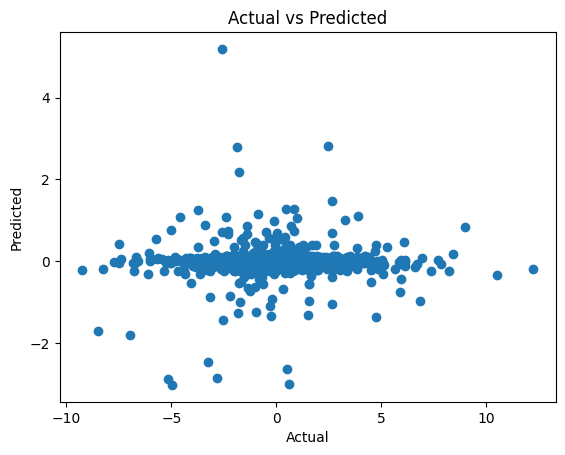

In [147]:
# create scatter plot of actual vs predicted
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

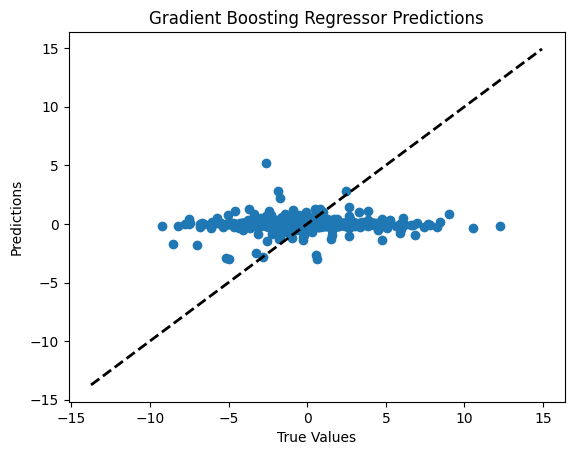

In [148]:
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Gradient Boosting Regressor Predictions')
plt.show()

In [149]:
feature_importances = gb_regressor.feature_importances_

# Get column names of your features
feature_names = X_train.columns

# Create a dictionary to map feature names to their importances
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort the dictionary by importance values (optional)
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print or access the feature importances
for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: volume, Importance: 0.3601224941313657
Feature: mkt_cap, Importance: 0.35593993059555534
Feature: log_name_price_attention, Importance: 0.2839375752730789


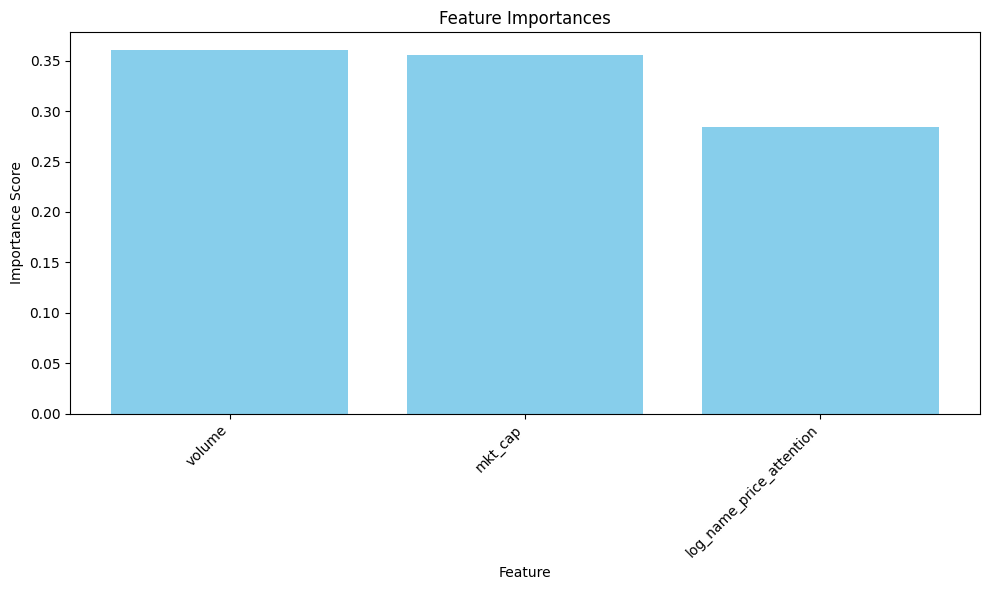

In [150]:
sorted_features = [x[0] for x in sorted_feature_importance]
sorted_importances = [x[1] for x in sorted_feature_importance]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_features)), sorted_importances, color="skyblue", align="center")
plt.xticks(range(len(sorted_features)), sorted_features, rotation=45, ha='right')
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

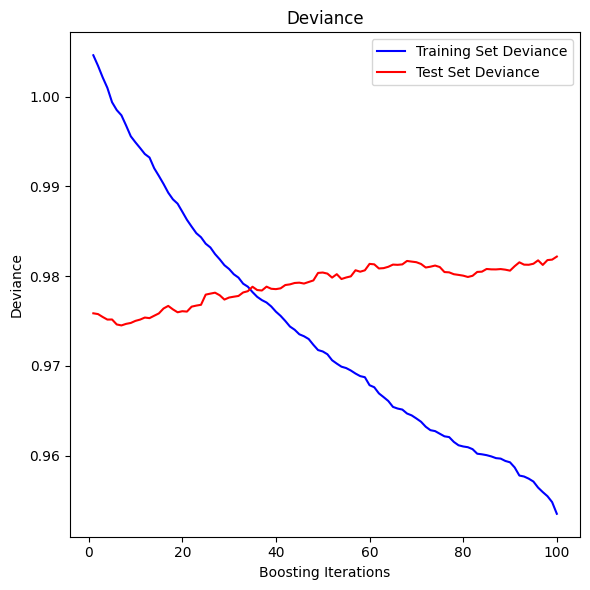

In [151]:
# Visualization 

test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(gb_regressor.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    gb_regressor.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

## Random Forest 

In [152]:
# construct random forest model 
from sklearn.ensemble import RandomForestRegressor

# Create a random forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=fix_seed)

# Fit the model
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse2 = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse2)

Mean Squared Error: 1.0719766602396048


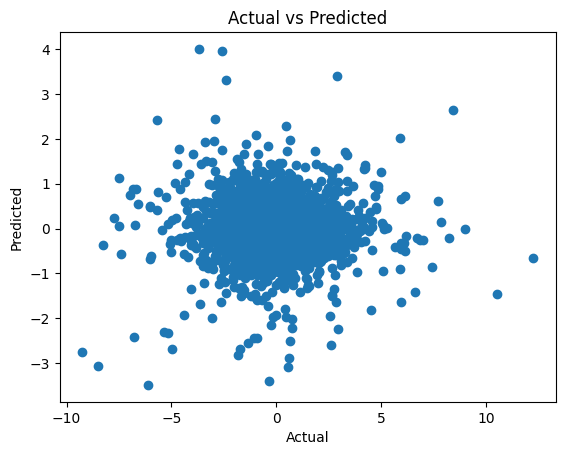

In [153]:
# show predictions vs actual
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

                            OLS Regression Results                            
Dep. Variable:             log_return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.574
Date:                Wed, 06 Mar 2024   Prob (F-statistic):             0.0521
Time:                        15:58:44   Log-Likelihood:             1.8538e+05
No. Observations:               70448   AIC:                        -3.708e+05
Df Residuals:                   70444   BIC:                        -3.707e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

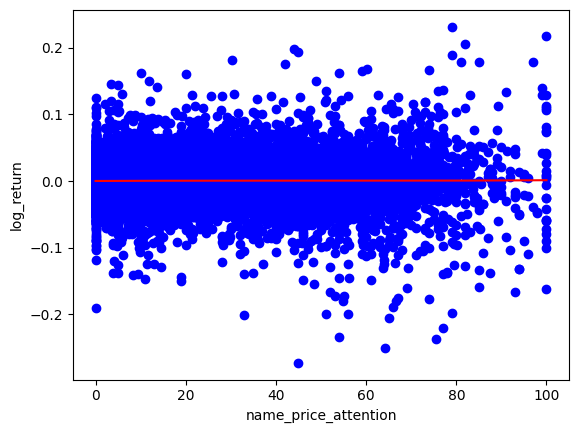

In [154]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame 'df' with 'name_price_attention' and 'log_return'

# Generate polynomial features
df['name_price_attention_squared'] = df['name_price_attention'] ** 2
df['name_price_attention_cubed'] = df['name_price_attention'] ** 3

# Define the independent variables (including polynomial terms) and the dependent variable
X = df[['name_price_attention', 'name_price_attention_squared', 'name_price_attention_cubed']]
y = df['log_return']

# Add a constant to the independent variables (intercept term)
X = sm.add_constant(X)

# Fit the polynomial regression model
model = sm.OLS(y, X).fit()

# Print out the statistics
print(model.summary())

# Plot the results
plt.scatter(df['name_price_attention'], y, color='blue')  # Plot the raw data
plt.xlabel('name_price_attention')
plt.ylabel('log_return')

# Prepare the data for plotting the fitted line
# Sorting the DataFrame by 'name_price_attention' so the line plot is ordered
df_sorted = df.sort_values(by='name_price_attention')

# Plot the fitted values
plt.plot(df_sorted['name_price_attention'], model.predict(sm.add_constant(df_sorted[['name_price_attention', 'name_price_attention_squared', 'name_price_attention_cubed']])), color='red')
plt.show()


In [155]:
import pandas as pd
from scipy import stats
from scipy.special import inv_boxcox
import numpy as np
import statsmodels.api as sm

# Load your data
# df = pd.read_csv('your_data.csv')  # If you have a CSV file

# I'm assuming the DataFrame from your screenshot is loaded into 'df'
# And assuming log returns are already calculated in the 'return' column

# Apply the Box-Cox transformation to a shifted version of 'name_price_attention' to make it positive
# Shift the data if there are non-positive values
df['name_price_attention_shifted'] = df['name_price_attention'] + abs(df['name_price_attention'].min()) + 1

# Apply the Box-Cox transformation
df['name_price_attention_transformed'], fitted_lambda = stats.boxcox(df['name_price_attention_shifted'])

# Fit the linear regression model
X = sm.add_constant(df['name_price_attention_transformed'])  # Adds a constant term to the predictor
model = sm.OLS(df['return'], X).fit()

# Print out the statistics
print(model.summary())

# Transform back to original scale if needed for interpretation
df['name_price_attention_back'] = inv_boxcox(df['name_price_attention_transformed'], fitted_lambda) - abs(df['name_price_attention'].min()) - 1


                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     15.19
Date:                Wed, 06 Mar 2024   Prob (F-statistic):           9.74e-05
Time:                        15:58:45   Log-Likelihood:             1.8542e+05
No. Observations:               70448   AIC:                        -3.708e+05
Df Residuals:                   70446   BIC:                        -3.708e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [156]:
from statsmodels.formula.api import ols

# Fit the model
model_all = ols('Q("return") ~ C(stock_dummy) + name_price_attention + volatility + mkt_cap ', data=df).fit()

# Get robust covariance results
model_all = model_all.get_robustcov_results()

# Print the summary
model_all.summary()

PatsyError: Error evaluating factor: NameError: name 'volatility' is not defined
    Q("return") ~ C(stock_dummy) + name_price_attention + volatility + mkt_cap
                                                          ^^^^^^^^^^

In [ ]:
# splitting the data 
fix_seed = 42

y = df['return']
X = df[['name_price_attention']]
X2 = df[['name_price_attention', 'mkt_cap']]
#X3 = df[['name_price_attention', 'daily_volatility']]
#X4 = df[['name_price_attention', 'volume']]
#X5 = df[['name_price_attention', 'mkt_cap']]
#X6 = df[['name_price_attention', 'mkt_cap']]
#X7 = df[['name_price_attention', 'mkt_cap']]
#X8 = df[['name_price_attention', 'mkt_cap']]
#X9 = df[['name_price_attention', 'mkt_cap']]
#X10 = df[['name_price_attention', 'mkt_cap']]
#X11 =  df[['name_price_attention', 'mkt_cap']]






X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=fix_seed)

In [ ]:
# create OLS regression for y and X
X_train = sm.add_constant(X_train)  
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

In [ ]:
# QQ plot for normality of residuals
fig = sm.qqplot(results.resid, line='45', fit=True)
plt.title('Normal Q-Q Plot')
plt.show()

# Residuals vs Fitted for homoscedasticity
plt.scatter(results.fittedvalues, results.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Scale-Location plot (also called Spread-Location plot)
plt.scatter(results.fittedvalues, results.resid**0.5)
plt.xlabel('Fitted values')
plt.ylabel('Sqrt of Residuals')
plt.title('Scale-Location Plot')
plt.show()

# Leverage plot to find influential cases
sm.graphics.influence_plot(results, criterion="cooks")
plt.title('Influence Plot')
plt.show()

Given these results we will use a robust regression which does not have these assumptions. 

In [ ]:
X6 = df[['name_price_attention', 'mkt_cap', 'volume']]

X6 = sm.add_constant(X6)  
model = sm.OLS(y, X6)
results = model.fit()
print(results.summary())

In [ ]:
# QQ plot for normality of residuals
fig = sm.qqplot(results.resid, line='45', fit=True)
plt.title('Normal Q-Q Plot')
plt.show()

# Residuals vs Fitted for homoscedasticity
plt.scatter(results.fittedvalues, results.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Scale-Location plot (also called Spread-Location plot)
plt.scatter(results.fittedvalues, results.resid**0.5)
plt.xlabel('Fitted values')
plt.ylabel('Sqrt of Residuals')
plt.title('Scale-Location Plot')
plt.show()

# Leverage plot to find influential cases
sm.graphics.influence_plot(results, criterion="cooks")
plt.title('Influence Plot')
plt.show()

In [ ]:
# create numpy arrays for each feature combination to later call in the OLS and robust regression 
X1 = df[['name_price_attention']]
X2 = df[['name_price_attention', 'mkt_cap']]
#X3 = df[['name_price_attention', 'daily_volatility']]
X4 = df[['name_price_attention', 'volume']]
#X5 = df[['name_price_attention', 'mkt_cap', 'daily_volatility']]
X6 = df[['name_price_attention', 'mkt_cap', 'volume']]
#X7 = df[['name_price_attention', 'volume', 'daily_volatility']]
#X8 = df[['name_price_attention', 'mkt_cap', 'volume', 'daily_volatility']]
#X8 = df[['name_price_attention', 'mkt_cap', 'volume', ]]

In [ ]:
# create a robust regression for each feature combination
X1 = sm.add_constant(X1)
model1 = sm.RLM(y, X1, M=sm.robust.norms.HuberT())
results1 = model1.fit()
print(results1.summary())

In [ ]:
X2 = sm.add_constant(X2)
model2 = sm.RLM(y, X2, M=sm.robust.norms.HuberT())
results2 = model.fit()
print(results2.summary())

In [ ]:
X3 = sm.add_constant(X3)
model3 = sm.RLM(y, X3, M=sm.robust.norms.HuberT())
results3 = model.fit()
print(results3.summary())

In [ ]:
X4 = sm.add_constant(X4)
model4 = sm.RLM(y, X4, M=sm.robust.norms.HuberT())
results4 = model.fit()
print(results4.summary())

In [ ]:
X5 = sm.add_constant(X5)
model5 = sm.RLM(y, X5, M=sm.robust.norms.HuberT())
results5 = model.fit()
print(results5.summary())

In [ ]:
X6 = sm.add_constant(X6)
model6 = sm.RLM(y, X6, M=sm.robust.norms.HuberT())
results6 = model.fit()
print(results6.summary())

In [ ]:
X7 = sm.add_constant(X7)
model7 = sm.RLM(y, X7, M=sm.robust.norms.HuberT())
results7 = model.fit()
print(results7.summary())

In [ ]:
X8 = sm.add_constant(X8)
model8 = sm.RLM(y, X8, M=sm.robust.norms.HuberT())
results8 = model.fit()
print(results8.summary())

In [ ]:
# print a regression table showing all the results 
from statsmodels.iolib.summary2 import summary_col
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=[results,results,results,results,results,results,results,results],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model 1','Model 2','Model 3','Model 4','Model 5','Model 6','Model 7','Model 8'],
                            info_dict=info_dict,
                            regressor_order=['const','name_price_attention', 'mkt_cap', 'daily_volatility', 'volume'])

results_table.add_title('Table 1 - OLS and Robust Regression Results')
print(results_table)

In [ ]:
# Create a summary table
from statsmodels.iolib.summary2 import summary_col

# You can customize the summary table further as needed
results_table = summary_col(models,
                             stars=True,
                             model_names=[
                                 'Model1', 'Model2', 'Model3',
                                 'Model4', 'Model5', 'Model6',
                                 'Model7', 'Model8'
                             ],
                             info_dict={
                                 'R2': lambda x: f"{x.rsquared:.2f}",
                                 'No. observations': lambda x: f"{int(x.nobs)}"
                             })

print(results_table)

